# Growth experiments

In [1]:
import sys, getopt
from simulator import Simulator
from compartment import Compartment
from diffusion import Diffusion
from common import default_radius_short
from colormap import Colormap
from main import print_concentrations
import numpy as np


In [2]:
def grow_rad(nr=3, textra=10, say="grow"):
    print("growing via anions: "+say)
    sim = Simulator().get_instance()
    gui = sim.gui()
    dt = 0.001  # s

    comp = []
    comp.append(Compartment("initial growth cone", z=-0.85
                            , cli=0.00433925284075134,
                            ki=0.1109567493822927,
                            nai=0.0255226350779378,
                            length=10e-5,
                            radius=0.75e-5))

    # steady state
    sim.run(stop=100, dt=0.001, plot_update_interval=500, data_collect_interval=5, block_after=False)

    # set diffusion value
    cli_D = 2.03
    cli_D *= 1e-7  # cm2 to dm2 (D in dm2/s)
    ki_D = 1.96
    ki_D *= 1e-7  # cm2 to dm2 (D in dm2/s)
    nai_D = 1.33
    nai_D *= 1e-7

    #another compartment
    comp.append(comp[0].copy("compartment 1"))
    comp[1].r = 1e-5
    comp[1].w = np.pi * comp[1].r ** 2 * comp[1].L
    diffusion_object = [Diffusion(comp[0], comp[1], ions={'cli': cli_D, 'ki': ki_D, 'nai': nai_D})]

    # heatmap incorporating compartment heights
    sc=5e6
    htplot = Colormap("dendrite",comp[0].w+comp[1].w,comp)
    totalht, init_vals = htplot.smallheatmap(comp, sc, int(htplot.totalh*sc), all=0, init_val=None)

    # plot
    voltage_reversal_graph_comp = gui.add_graph() \
        .add_ion_conc(comp[0], "ecl", line_style='g', y_units_scale=1000, y_plot_units='mV') \
        .add_ion_conc(comp[0], "ek", line_style='b', y_units_scale=1000, y_plot_units='mV') \
        .add_voltage(comp[0], line_style='k', y_units_scale=1000, y_plot_units='mV')

    volume_graph = gui.add_graph()
    volume_graph.add_var(volume_graph.time,"time",htplot,"comp0w",line_style='k')
    volume_graph.add_var(volume_graph.time,"time",htplot,"totalh",line_style='b')

    sim.run(continuefor=1, dt=dt*0.001, plot_update_interval=0.5, data_collect_interval=textra/16)
    
    volume_graph.save('graphs/'+say+'_timeinit.eps')

    # growth
    for i in range(nr):
        htplot.smallheatmap(comp, sc, totalht, all=0, init_val=init_vals, name='graphs/'+say+'_done'+str(i)+'.eps')
        comp[0].gx = 1

        # stop at certain length
        while comp[0].r < 1.25e-5:
            print("Fluxing compartment's"+say+":"+str(comp[0].r))
            sim.run(continuefor=0.5, dt=dt*0.001, plot_update_interval=0.25, data_collect_interval=textra/16)
            if 0.98e-5<comp[0].r<1.0e-5:
                htplot.smallheatmap(comp, sc, totalht, all=0, init_val=init_vals, name='graphs/'+say+'_interim'+str(i)+'.eps')
        comp[0].gx = 0
        print_concentrations(comp,str(i))

        # split compartments
        comp.insert(0,comp[0].copy("compartment "+str(i)))
        comp[1].r -= 0.25e-5
        comp[0].r = 0.75e-5
        comp[0].w = np.pi * comp[0].r ** 2 * comp[0].L
        comp[1].w = np.pi * comp[1].r ** 2 * comp[1].L

        print_concentrations(comp,str(i))

        # update total height
        htplot.comp = comp

        # update diffusion
        diffusion_object.append(Diffusion(comp[0], comp[1], ions={'cli': cli_D, 'ki': ki_D, 'nai': nai_D}))

        for a in comp:
            print(a.name)

        for j in diffusion_object:
            print(j.name)

        sim.run(continuefor=10, dt=dt*0.001, plot_update_interval=5, data_collect_interval=textra/16)
        volume_graph.save('graphs/'+say+'_time'+str(i)+'.eps')

    htplot.smallheatmap(comp, sc, totalht, all=1, init_val=init_vals, name='graphs/'+say+'_end.eps')
    sim.run(continuefor=4, dt=dt*0.001, plot_update_interval=2, data_collect_interval=0.5)
    htplot.smallheatmap(comp, sc, totalht, all=1, init_val=init_vals, name='graphs/'+say+'_end.eps')

    return sim, gui

growth
growing via anions: grow_rad
Compartment initial growth cone not osmo-neutral
running from 0.000000 s until 100.000000 s with time step of 0.001 seconds 


/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


time taken: 5.699357
Compartment compartment 1 not osmo-neutral
initial growth cone<-compartment 1
None
None
running from 100.000000 s until 101.000000 s with time step of 1e-06 seconds 
time taken: 140.607912
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [37, 49]


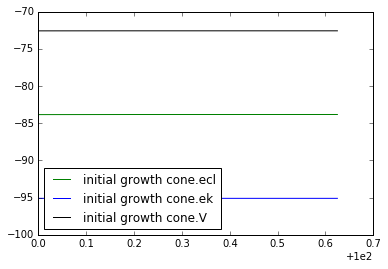

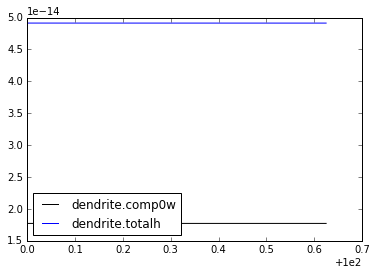

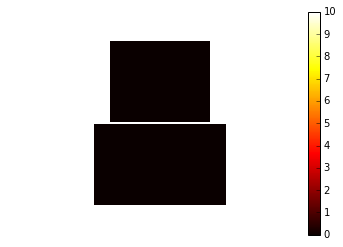

Radii: [37, 49]


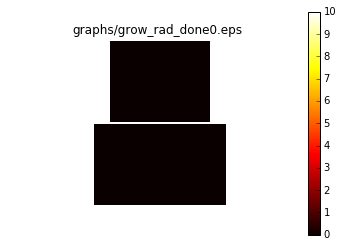

Fluxing compartment'sgrow_rad:7.51169592929e-06
running from 101.000000 s until 101.500000 s with time step of 1e-06 seconds 
time taken: 210.809682
Fluxing compartment'sgrow_rad:7.52470835541e-06
running from 101.500000 s until 102.000000 s with time step of 1e-06 seconds 
time taken: 279.488242
Fluxing compartment'sgrow_rad:7.55175298225e-06
running from 102.000000 s until 102.500000 s with time step of 1e-06 seconds 
time taken: 354.03712
Fluxing compartment'sgrow_rad:7.58383952252e-06
running from 102.500000 s until 103.000000 s with time step of 1e-06 seconds 
time taken: 423.619011
Fluxing compartment'sgrow_rad:7.61779350023e-06
running from 103.000000 s until 103.500000 s with time step of 1e-06 seconds 
time taken: 493.065602
Fluxing compartment'sgrow_rad:7.65249443885e-06
running from 103.500000 s until 104.000000 s with time step of 1e-06 seconds 
time taken: 562.741821
Fluxing compartment'sgrow_rad:7.68754425921e-06
running from 104.000000 s until 104.500000 s with time step

time taken: 3967.183087
Fluxing compartment'sgrow_rad:9.50073808434e-06
running from 128.500000 s until 129.000000 s with time step of 1e-06 seconds 
time taken: 4036.159766
Fluxing compartment'sgrow_rad:9.53849777175e-06
running from 129.000000 s until 129.500000 s with time step of 1e-06 seconds 
time taken: 4105.360038
Fluxing compartment'sgrow_rad:9.57626488691e-06
running from 129.500000 s until 130.000000 s with time step of 1e-06 seconds 
time taken: 4174.828327
Fluxing compartment'sgrow_rad:9.61403897154e-06
running from 130.000000 s until 130.500000 s with time step of 1e-06 seconds 
time taken: 4244.630653
Fluxing compartment'sgrow_rad:9.65181959949e-06
running from 130.500000 s until 131.000000 s with time step of 1e-06 seconds 
time taken: 4314.896135
Fluxing compartment'sgrow_rad:9.68960637449e-06
running from 131.000000 s until 131.500000 s with time step of 1e-06 seconds 
time taken: 4384.410939
Fluxing compartment'sgrow_rad:9.72739892807e-06
running from 131.500000 s un

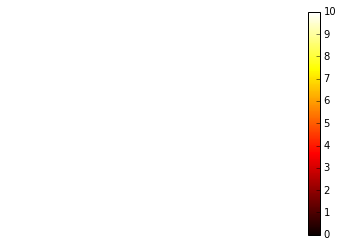

Radii: [49, 49]


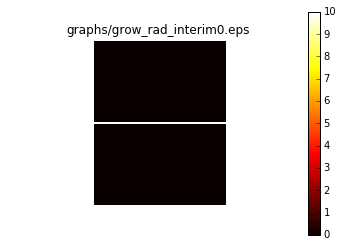

Fluxing compartment'sgrow_rad:9.80300002438e-06
running from 132.500000 s until 133.000000 s with time step of 1e-06 seconds 
time taken: 4596.08232
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [49, 49]


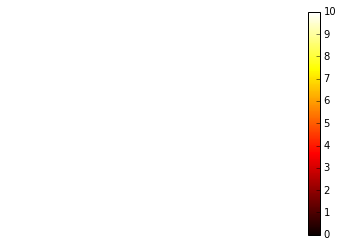

Radii: [49, 49]


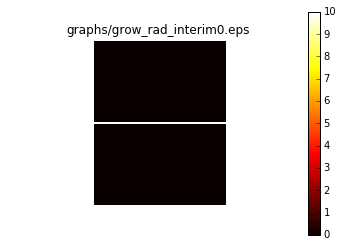

Fluxing compartment'sgrow_rad:9.84080795218e-06
running from 133.000000 s until 133.500000 s with time step of 1e-06 seconds 
time taken: 4666.752484
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [49, 49]


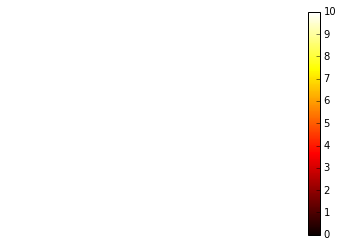

Radii: [49, 49]


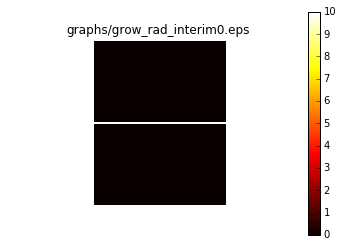

Fluxing compartment'sgrow_rad:9.87862042538e-06
running from 133.500000 s until 134.000000 s with time step of 1e-06 seconds 
time taken: 4739.218812
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [49, 49]


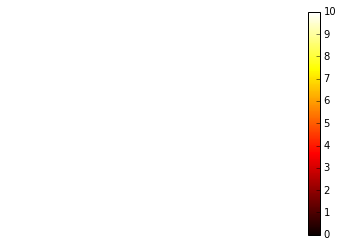

Radii: [49, 49]


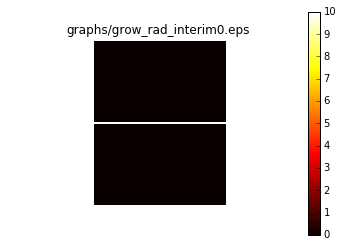

Fluxing compartment'sgrow_rad:9.91643718769e-06
running from 134.000000 s until 134.500000 s with time step of 1e-06 seconds 
time taken: 4810.538119
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [49, 49]


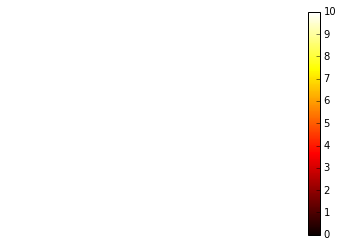

Radii: [49, 49]


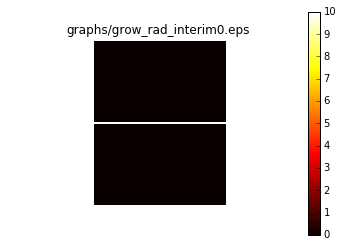

Fluxing compartment'sgrow_rad:9.95425800066e-06
running from 134.500000 s until 135.000000 s with time step of 1e-06 seconds 
time taken: 4882.001346
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [49, 49]


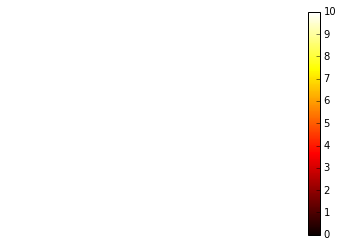

Radii: [49, 49]


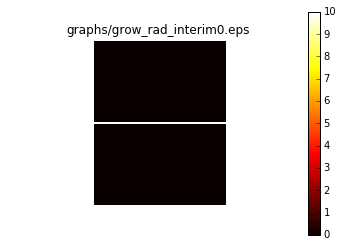

Fluxing compartment'sgrow_rad:9.99208264251e-06
running from 135.000000 s until 135.500000 s with time step of 1e-06 seconds 
time taken: 4952.431808
Fluxing compartment'sgrow_rad:1.00299109068e-05
running from 135.500000 s until 136.000000 s with time step of 1e-06 seconds 
time taken: 5021.876855
Fluxing compartment'sgrow_rad:1.00677426016e-05
running from 136.000000 s until 136.500000 s with time step of 1e-06 seconds 
time taken: 5091.37318
Fluxing compartment'sgrow_rad:1.01055775481e-05
running from 136.500000 s until 137.000000 s with time step of 1e-06 seconds 
time taken: 5161.022794
Fluxing compartment'sgrow_rad:1.014341558e-05
running from 137.000000 s until 137.500000 s with time step of 1e-06 seconds 
time taken: 5230.753989
Fluxing compartment'sgrow_rad:1.01812565423e-05
running from 137.500000 s until 138.000000 s with time step of 1e-06 seconds 
time taken: 5299.59978
Fluxing compartment'sgrow_rad:1.02191002907e-05
running from 138.000000 s until 138.500000 s with time s

time taken: 8738.250818
Fluxing compartment'sgrow_rad:1.20753887737e-05
running from 162.500000 s until 163.000000 s with time step of 1e-06 seconds 
time taken: 8807.246381
Fluxing compartment'sgrow_rad:1.21132979554e-05
running from 163.000000 s until 163.500000 s with time step of 1e-06 seconds 
time taken: 8876.293073
Fluxing compartment'sgrow_rad:1.215120792e-05
running from 163.500000 s until 164.000000 s with time step of 1e-06 seconds 
time taken: 8945.317203
Fluxing compartment'sgrow_rad:1.21891186613e-05
running from 164.000000 s until 164.500000 s with time step of 1e-06 seconds 
time taken: 9014.601599
Fluxing compartment'sgrow_rad:1.22270301732e-05
running from 164.500000 s until 165.000000 s with time step of 1e-06 seconds 
time taken: 9083.769433
Fluxing compartment'sgrow_rad:1.22649424501e-05
running from 165.000000 s until 165.500000 s with time step of 1e-06 seconds 
time taken: 9153.106414
Fluxing compartment'sgrow_rad:1.23028554864e-05
running from 165.500000 s unti

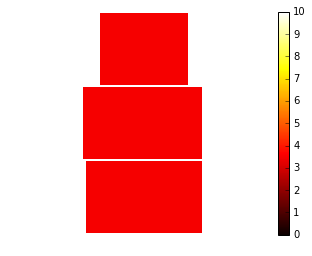

Radii: [37, 50, 49]


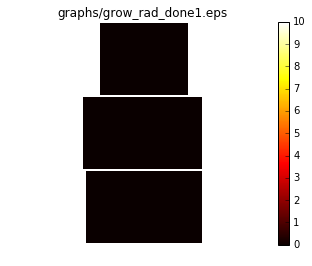

Fluxing compartment'sgrow_rad:7.56651771927e-06
running from 178.500000 s until 179.000000 s with time step of 1e-06 seconds 
time taken: 11929.548244
Fluxing compartment'sgrow_rad:7.58078587915e-06
running from 179.000000 s until 179.500000 s with time step of 1e-06 seconds 
time taken: 12041.940897
Fluxing compartment'sgrow_rad:7.60943495398e-06
running from 179.500000 s until 180.000000 s with time step of 1e-06 seconds 
time taken: 12154.362554
Fluxing compartment'sgrow_rad:7.64326089369e-06
running from 180.000000 s until 180.500000 s with time step of 1e-06 seconds 
time taken: 12268.236563
Fluxing compartment'sgrow_rad:7.67897494073e-06
running from 180.500000 s until 181.000000 s with time step of 1e-06 seconds 
time taken: 12380.541598
Fluxing compartment'sgrow_rad:7.7154029927e-06
running from 181.000000 s until 181.500000 s with time step of 1e-06 seconds 
time taken: 12493.46231
Fluxing compartment'sgrow_rad:7.75212361845e-06
running from 181.500000 s until 182.000000 s wit

time taken: 18303.814029
Fluxing compartment'sgrow_rad:9.59473126419e-06
running from 206.000000 s until 206.500000 s with time step of 1e-06 seconds 
time taken: 18440.701187
Fluxing compartment'sgrow_rad:9.6326713553e-06
running from 206.500000 s until 207.000000 s with time step of 1e-06 seconds 
time taken: 18574.459326
Fluxing compartment'sgrow_rad:9.67061602798e-06
running from 207.000000 s until 207.500000 s with time step of 1e-06 seconds 
time taken: 18709.741871
Fluxing compartment'sgrow_rad:9.70856506789e-06
running from 207.500000 s until 208.000000 s with time step of 1e-06 seconds 
time taken: 18845.828033
Fluxing compartment'sgrow_rad:9.74651827278e-06
running from 208.000000 s until 208.500000 s with time step of 1e-06 seconds 
time taken: 18981.775996
Fluxing compartment'sgrow_rad:9.78447545183e-06
running from 208.500000 s until 209.000000 s with time step of 1e-06 seconds 
time taken: 19120.006913
[[0.011249999999999996], [-0.083839999999999998], [-0.0725900000000000

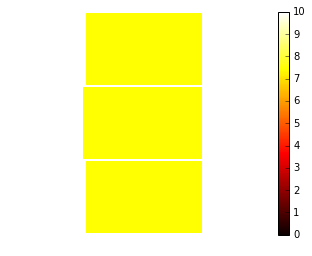

Radii: [49, 50, 49]


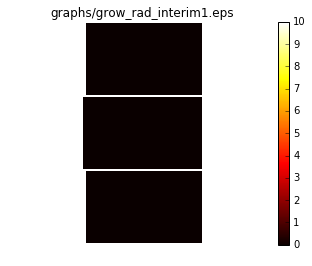

Fluxing compartment'sgrow_rad:9.822436425e-06
running from 209.000000 s until 209.500000 s with time step of 1e-06 seconds 
time taken: 19260.689812
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [49, 50, 49]


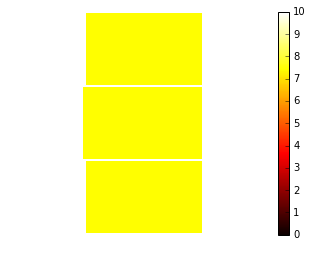

Radii: [49, 50, 49]


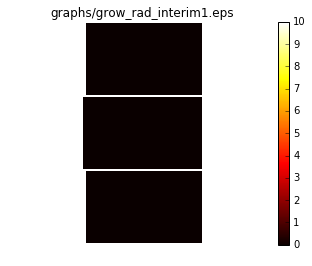

Fluxing compartment'sgrow_rad:9.86040102238e-06
running from 209.500000 s until 210.000000 s with time step of 1e-06 seconds 
time taken: 19400.081737
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [49, 50, 49]


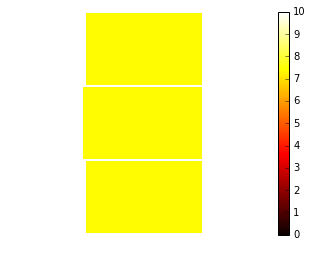

Radii: [49, 50, 49]


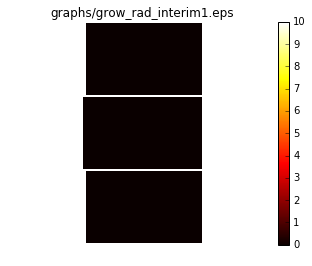

Fluxing compartment'sgrow_rad:9.89836908362e-06
running from 210.000000 s until 210.500000 s with time step of 1e-06 seconds 
time taken: 19540.218695
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [49, 50, 49]


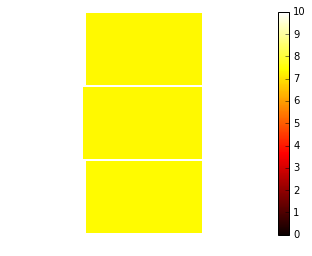

Radii: [49, 50, 49]


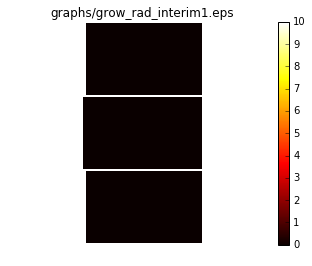

Fluxing compartment'sgrow_rad:9.9363404574e-06
running from 210.500000 s until 211.000000 s with time step of 1e-06 seconds 
time taken: 19678.900533
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [49, 50, 49]


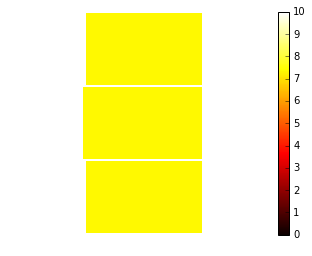

Radii: [49, 50, 49]


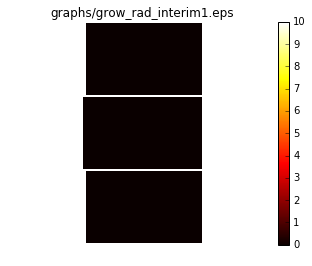

Fluxing compartment'sgrow_rad:9.97431500088e-06
running from 211.000000 s until 211.500000 s with time step of 1e-06 seconds 
time taken: 19815.782773
Fluxing compartment'sgrow_rad:1.00122925792e-05
running from 211.500000 s until 212.000000 s with time step of 1e-06 seconds 
time taken: 19951.309322
Fluxing compartment'sgrow_rad:1.00502730651e-05
running from 212.000000 s until 212.500000 s with time step of 1e-06 seconds 
time taken: 20088.286452
Fluxing compartment'sgrow_rad:1.00882563384e-05
running from 212.500000 s until 213.000000 s with time step of 1e-06 seconds 
time taken: 20224.804768
Fluxing compartment'sgrow_rad:1.01262422856e-05
running from 213.000000 s until 213.500000 s with time step of 1e-06 seconds 
time taken: 20360.343166
Fluxing compartment'sgrow_rad:1.01642307994e-05
running from 213.500000 s until 214.000000 s with time step of 1e-06 seconds 
time taken: 20498.13278
Fluxing compartment'sgrow_rad:1.02022217786e-05
running from 214.000000 s until 214.500000 s wi

time taken: 27062.021576
Fluxing compartment'sgrow_rad:1.20656378724e-05
running from 238.500000 s until 239.000000 s with time step of 1e-06 seconds 
time taken: 27196.407371
Fluxing compartment'sgrow_rad:1.21036920188e-05
running from 239.000000 s until 239.500000 s with time step of 1e-06 seconds 
time taken: 27332.011774
Fluxing compartment'sgrow_rad:1.21417469113e-05
running from 239.500000 s until 240.000000 s with time step of 1e-06 seconds 
time taken: 27466.003038
Fluxing compartment'sgrow_rad:1.21798025421e-05
running from 240.000000 s until 240.500000 s with time step of 1e-06 seconds 
time taken: 27599.93698
Fluxing compartment'sgrow_rad:1.22178589033e-05
running from 240.500000 s until 241.000000 s with time step of 1e-06 seconds 
time taken: 27732.908799
Fluxing compartment'sgrow_rad:1.22559159877e-05
running from 241.000000 s until 241.500000 s with time step of 1e-06 seconds 
time taken: 27869.419253
Fluxing compartment'sgrow_rad:1.22939737881e-05
running from 241.50000

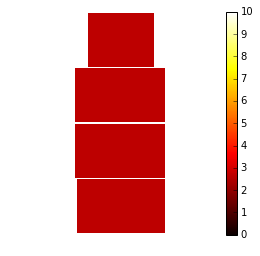

Radii: [37, 50, 50, 49]


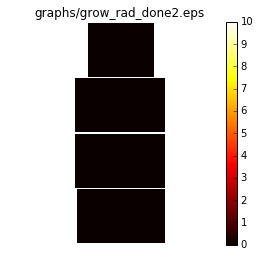

Fluxing compartment'sgrow_rad:7.55747493039e-06
running from 254.500000 s until 255.000000 s with time step of 1e-06 seconds 
time taken: 32304.905636
Fluxing compartment'sgrow_rad:7.5716835939e-06
running from 255.000000 s until 255.500000 s with time step of 1e-06 seconds 
time taken: 32476.828311
Fluxing compartment'sgrow_rad:7.60050765347e-06
running from 255.500000 s until 256.000000 s with time step of 1e-06 seconds 
time taken: 32648.854131
Fluxing compartment'sgrow_rad:7.63461497835e-06
running from 256.000000 s until 256.500000 s with time step of 1e-06 seconds 
time taken: 32818.123994
Fluxing compartment'sgrow_rad:7.67064909948e-06
running from 256.500000 s until 257.000000 s with time step of 1e-06 seconds 
time taken: 32988.522674
Fluxing compartment'sgrow_rad:7.70740449322e-06
running from 257.000000 s until 257.500000 s with time step of 1e-06 seconds 
time taken: 33158.569851
Fluxing compartment'sgrow_rad:7.74444621131e-06
running from 257.500000 s until 258.000000 s wi

time taken: 41639.606103
Fluxing compartment'sgrow_rad:9.59369447923e-06
running from 282.000000 s until 282.500000 s with time step of 1e-06 seconds 
time taken: 41815.593582
Fluxing compartment'sgrow_rad:9.63170850667e-06
running from 282.500000 s until 283.000000 s with time step of 1e-06 seconds 
time taken: 41987.025194
Fluxing compartment'sgrow_rad:9.66972688133e-06
running from 283.000000 s until 283.500000 s with time step of 1e-06 seconds 
time taken: 42160.96704
Fluxing compartment'sgrow_rad:9.70774941948e-06
running from 283.500000 s until 284.000000 s with time step of 1e-06 seconds 
time taken: 42331.807392
Fluxing compartment'sgrow_rad:9.74577594644e-06
running from 284.000000 s until 284.500000 s with time step of 1e-06 seconds 
time taken: 42501.347109
Fluxing compartment'sgrow_rad:9.78380629619e-06
running from 284.500000 s until 285.000000 s with time step of 1e-06 seconds 
time taken: 42671.708291
[[0.011249999999999996], [-0.083839999999999998], [-0.0725900000000000

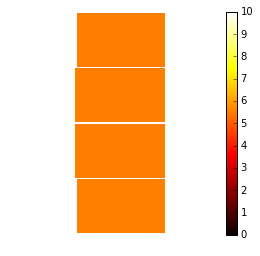

Radii: [49, 50, 50, 49]


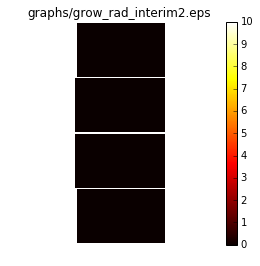

Fluxing compartment'sgrow_rad:9.8218403109e-06
running from 285.000000 s until 285.500000 s with time step of 1e-06 seconds 
time taken: 42841.465783
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [49, 50, 50, 49]


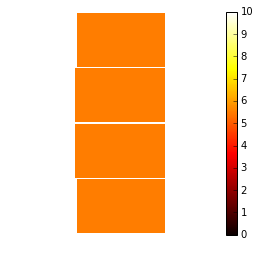

Radii: [49, 50, 50, 49]


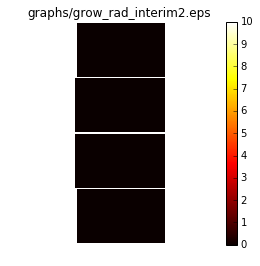

Fluxing compartment'sgrow_rad:9.85987784055e-06
running from 285.500000 s until 286.000000 s with time step of 1e-06 seconds 
time taken: 43013.603566
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [49, 50, 50, 49]


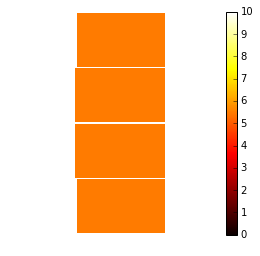

Radii: [49, 50, 50, 49]


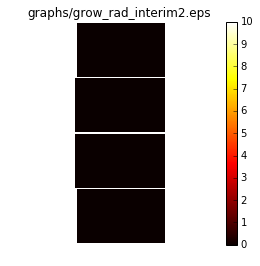

Fluxing compartment'sgrow_rad:9.89791874253e-06
running from 286.000000 s until 286.500000 s with time step of 1e-06 seconds 
time taken: 43184.45681
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [49, 50, 50, 49]


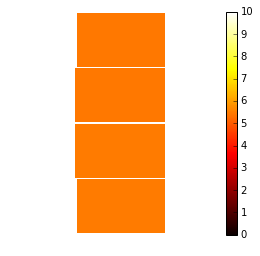

Radii: [49, 50, 50, 49]


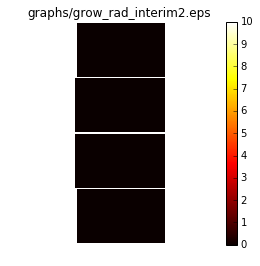

Fluxing compartment'sgrow_rad:9.93596288127e-06
running from 286.500000 s until 287.000000 s with time step of 1e-06 seconds 
time taken: 43354.652291
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [49, 50, 50, 49]


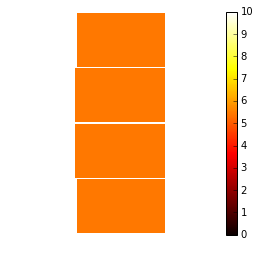

Radii: [49, 50, 50, 49]


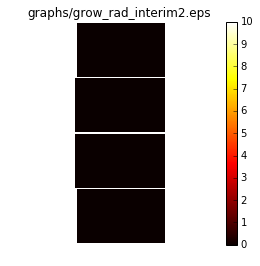

Fluxing compartment'sgrow_rad:9.97401012787e-06
running from 287.000000 s until 287.500000 s with time step of 1e-06 seconds 
time taken: 43526.748249
Fluxing compartment'sgrow_rad:1.00120603598e-05
running from 287.500000 s until 288.000000 s with time step of 1e-06 seconds 
time taken: 43696.865044
Fluxing compartment'sgrow_rad:1.00501134605e-05
running from 288.000000 s until 288.500000 s with time step of 1e-06 seconds 
time taken: 43868.198856
Fluxing compartment'sgrow_rad:1.00881693193e-05
running from 288.500000 s until 289.000000 s with time step of 1e-06 seconds 
time taken: 44040.453025
Fluxing compartment'sgrow_rad:1.01262278308e-05
running from 289.000000 s until 289.500000 s with time step of 1e-06 seconds 
time taken: 44213.346421
Fluxing compartment'sgrow_rad:1.01642888948e-05
running from 289.500000 s until 290.000000 s with time step of 1e-06 seconds 
time taken: 44383.263488
Fluxing compartment'sgrow_rad:1.0202352416e-05
running from 290.000000 s until 290.500000 s wi

time taken: 52775.561357
Fluxing compartment'sgrow_rad:1.20693172541e-05
running from 314.499999 s until 314.999999 s with time step of 1e-06 seconds 
time taken: 52945.561256
Fluxing compartment'sgrow_rad:1.21074429828e-05
running from 314.999999 s until 315.499999 s with time step of 1e-06 seconds 
time taken: 53114.627495
Fluxing compartment'sgrow_rad:1.21455693925e-05
running from 315.499999 s until 315.999999 s with time step of 1e-06 seconds 
time taken: 53284.668198
Fluxing compartment'sgrow_rad:1.21836964739e-05
running from 315.999999 s until 316.499999 s with time step of 1e-06 seconds 
time taken: 53454.275679
Fluxing compartment'sgrow_rad:1.22218242181e-05
running from 316.499999 s until 316.999999 s with time step of 1e-06 seconds 
time taken: 53624.661131
Fluxing compartment'sgrow_rad:1.22599526162e-05
running from 316.999999 s until 317.499999 s with time step of 1e-06 seconds 
time taken: 53797.421717
Fluxing compartment'sgrow_rad:1.229808166e-05
running from 317.499999

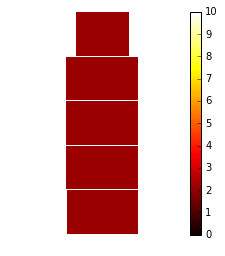

Radii: [37, 50, 50, 50, 49]


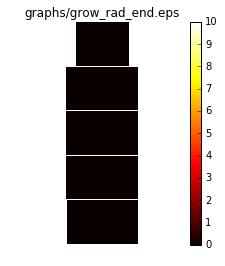

Radii: [37, 50, 50, 50, 49]


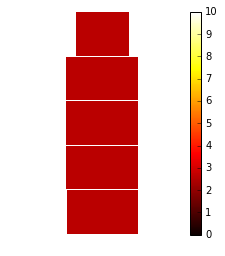

Radii: [37, 50, 50, 50, 49]


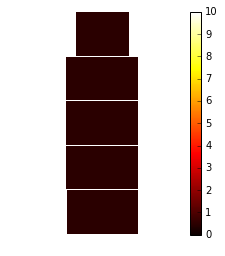

running from 330.499999 s until 334.499999 s with time step of 1e-06 seconds 
time taken: 61020.351138
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]
Radii: [37, 50, 50, 50, 49]


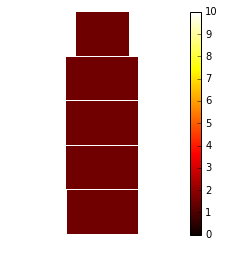

Radii: [37, 50, 50, 50, 49]


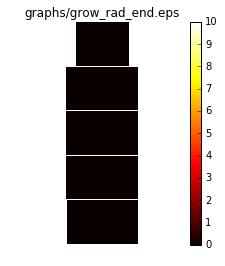

Radii: [37, 50, 50, 50, 49]


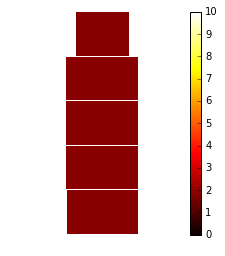

Radii: [37, 50, 50, 50, 49]


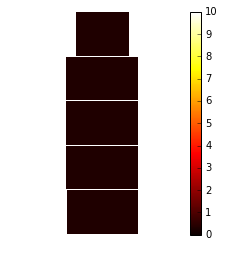

In [3]:
[sim,gui]=grow_rad(nr=3,textra=7,say='grow_rad')

In [2]:
def grow_ht(nr=3, textra=10, say="grow"):
    print("growing via anions: "+say)
    sim = Simulator().get_instance()
    gui = sim.gui()
    dt = 0.001  # s

    comp = []
    comp.append(Compartment("initial growth cone", z=-0.85
                            , cli=0.00433925284075134,
                            ki=0.1109567493822927,
                            nai=0.0255226350779378,
                            length=5e-5,
                            radius=default_radius_short))

    # steady state
    sim.run(stop=100, dt=0.001, plot_update_interval=500, data_collect_interval=5, block_after=False)

    # set diffusion value
    cli_D = 2.03
    cli_D *= 1e-7  # cm2 to dm2 (D in dm2/s)
    ki_D = 1.96
    ki_D *= 1e-7  # cm2 to dm2 (D in dm2/s)
    nai_D = 1.33
    nai_D *= 1e-7

    #another compartment
    comp.append(comp[0].copy("compartment 1"))
    comp[1].L = 10e-5
    comp[1].w = np.pi * comp[1].r ** 2 * comp[1].L
    diffusion_object = [Diffusion(comp[0], comp[1], ions={'cli': cli_D, 'ki': ki_D, 'nai': nai_D})]

    # heatmap incorporating compartment heights
    sc=5e5
    htplot = Colormap("dendrite",comp[0].w+comp[1].w,comp)
    totalht, init_vals = htplot.smallheatmap(comp, sc, int(htplot.totalh*sc), all=0, init_val=None, radial=False)

    # plot
    voltage_reversal_graph_comp = gui.add_graph() \
        .add_ion_conc(comp[0], "ecl", line_style='g', y_units_scale=1000, y_plot_units='mV') \
        .add_ion_conc(comp[0], "ek", line_style='b', y_units_scale=1000, y_plot_units='mV') \
        .add_voltage(comp[0], line_style='k', y_units_scale=1000, y_plot_units='mV')

    volume_graph = gui.add_graph()
    volume_graph.add_var(volume_graph.time,"time",htplot,"comp0w",line_style='k')
    volume_graph.add_var(volume_graph.time,"time",htplot,"totalh",line_style='b')

    sim.run(continuefor=1, dt=dt*0.001, plot_update_interval=0.5, data_collect_interval=textra/16)
    
    volume_graph.save('graphs/'+say+'_timeinit.eps')

    # growth
    for i in range(nr):
        htplot.smallheatmap(comp, sc, totalht, all=0, init_val=init_vals, name='graphs/'+say+'_done'+str(i)+'.eps',radial=False)
        comp[0].gx = 1

        # stop at certain length
        while comp[0].L < 15e-5:
            print("Fluxing compartment's"+say+":"+str(comp[0].L))
            sim.run(continuefor=0.5, dt=dt*0.001, plot_update_interval=0.25, data_collect_interval=textra/16)
            if 9.99e-5<comp[0].L<10e-5:
                htplot.smallheatmap(comp, sc, totalht, all=0, init_val=init_vals, name='graphs/'+say+'_interim'+str(i)+'.eps',radial=False)
        comp[0].gx = 0
        print_concentrations(comp,str(i))

        # split compartments
        comp.insert(0,comp[0].copy("compartment "+str(i)))
        comp[1].L -= 5e-5
        comp[0].L = 5e-5
        comp[0].w = np.pi * comp[0].r ** 2 * comp[0].L
        comp[1].w = np.pi * comp[1].r ** 2 * comp[1].L

        print_concentrations(comp,str(i))

        # update total height
        htplot.comp = comp

        # update diffusion
        diffusion_object.append(Diffusion(comp[0], comp[1], ions={'cli': cli_D, 'ki': ki_D, 'nai': nai_D}))

        for a in comp:
            print(a.name)

        for j in diffusion_object:
            print(j.name)

        sim.run(continuefor=10, dt=dt*0.001, plot_update_interval=5, data_collect_interval=textra/16)
        volume_graph.save('graphs/'+say+'_time'+str(i)+'.eps')

    htplot.smallheatmap(comp, sc, totalht, all=1, init_val=init_vals, name='graphs/'+say+'_end.eps',radial=False)
    sim.run(continuefor=4, dt=dt*0.001, plot_update_interval=2, data_collect_interval=0.5)
    htplot.smallheatmap(comp, sc, totalht, all=1, init_val=init_vals, name='graphs/'+say+'_end.eps',radial=False)
    volume_graph.save('graphs/'+say+'_time'+str(nr)+'.eps')

    return sim, gui

## Need to manually change the method of updating volume in the compartment file from "update_radius" to "update_height" for the volume shifts to be manifested in radial change

growing via anions: grow_ht
Compartment initial growth cone not osmo-neutral
running from 0.000000 s until 100.000000 s with time step of 0.001 seconds 


/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


time taken: 6.151892
Compartment compartment 1 not osmo-neutral
initial growth cone<-compartment 1
None
None
running from 100.000000 s until 101.000000 s with time step of 1e-06 seconds 
time taken: 171.286282
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]


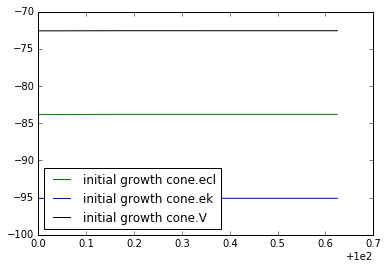

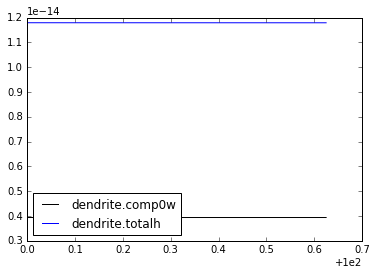

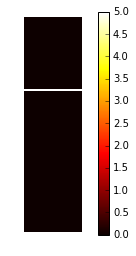

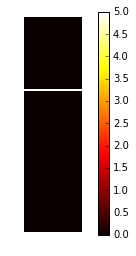

Fluxing compartment'sgrow_ht:5.01541908363e-05
running from 101.000000 s until 101.500000 s with time step of 1e-06 seconds 
time taken: 260.520042
Fluxing compartment'sgrow_ht:5.05060307045e-05
running from 101.500000 s until 102.000000 s with time step of 1e-06 seconds 
time taken: 341.956024
Fluxing compartment'sgrow_ht:5.11526322064e-05
running from 102.000000 s until 102.500000 s with time step of 1e-06 seconds 
time taken: 425.392576
Fluxing compartment'sgrow_ht:5.18716386982e-05
running from 102.500000 s until 103.000000 s with time step of 1e-06 seconds 
time taken: 516.455579
Fluxing compartment'sgrow_ht:5.26163547412e-05
running from 103.000000 s until 103.500000 s with time step of 1e-06 seconds 
time taken: 602.111054
Fluxing compartment'sgrow_ht:5.33768928403e-05
running from 103.500000 s until 104.000000 s with time step of 1e-06 seconds 
time taken: 685.948278
Fluxing compartment'sgrow_ht:5.41511708015e-05
running from 104.000000 s until 104.500000 s with time step of 1e

time taken: 4614.692264
Fluxing compartment'sgrow_ht:0.000112694448692
running from 129.000000 s until 129.500000 s with time step of 1e-06 seconds 
time taken: 4691.867879
Fluxing compartment'sgrow_ht:0.000114347876772
running from 129.500000 s until 130.000000 s with time step of 1e-06 seconds 
time taken: 4768.932047
Fluxing compartment'sgrow_ht:0.000116024571091
running from 130.000000 s until 130.500000 s with time step of 1e-06 seconds 
time taken: 4846.345701
Fluxing compartment'sgrow_ht:0.000117724831963
running from 130.500000 s until 131.000000 s with time step of 1e-06 seconds 
time taken: 4924.687265
Fluxing compartment'sgrow_ht:0.000119448963203
running from 131.000000 s until 131.500000 s with time step of 1e-06 seconds 
time taken: 5002.221073
Fluxing compartment'sgrow_ht:0.000121197272133
running from 131.500000 s until 132.000000 s with time step of 1e-06 seconds 
time taken: 5080.035165
Fluxing compartment'sgrow_ht:0.000122970069583
running from 132.000000 s until 132

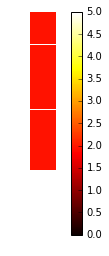

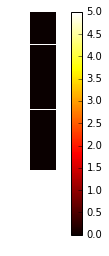

Fluxing compartment'sgrow_ht:5.20521418903e-05
running from 149.000000 s until 149.500000 s with time step of 1e-06 seconds 
time taken: 8845.186308
Fluxing compartment'sgrow_ht:5.26623544623e-05
running from 149.500000 s until 150.000000 s with time step of 1e-06 seconds 
time taken: 8971.647351
Fluxing compartment'sgrow_ht:5.34548261026e-05
running from 150.000000 s until 150.500000 s with time step of 1e-06 seconds 
time taken: 9099.618468
Fluxing compartment'sgrow_ht:5.42624458306e-05
running from 150.500000 s until 151.000000 s with time step of 1e-06 seconds 
time taken: 9224.345995
Fluxing compartment'sgrow_ht:5.50831099852e-05
running from 151.000000 s until 151.500000 s with time step of 1e-06 seconds 
time taken: 9351.213621
Fluxing compartment'sgrow_ht:5.5916858085e-05
running from 151.500000 s until 152.000000 s with time step of 1e-06 seconds 
time taken: 9477.202515
Fluxing compartment'sgrow_ht:5.6763813621e-05
running from 152.000000 s until 152.500000 s with time step o

time taken: 15652.33789
Fluxing compartment'sgrow_ht:0.000118753833578
running from 176.500000 s until 177.000000 s with time step of 1e-06 seconds 
time taken: 15780.971431
Fluxing compartment'sgrow_ht:0.000120547728952
running from 177.000000 s until 177.500000 s with time step of 1e-06 seconds 
time taken: 15908.000813
Fluxing compartment'sgrow_ht:0.000122368167151
running from 177.500000 s until 178.000000 s with time step of 1e-06 seconds 
time taken: 16037.404141
Fluxing compartment'sgrow_ht:0.000124215526783
running from 178.000000 s until 178.500000 s with time step of 1e-06 seconds 
time taken: 16165.015467
Fluxing compartment'sgrow_ht:0.000126090191656
running from 178.500000 s until 179.000000 s with time step of 1e-06 seconds 
time taken: 16294.240092
Fluxing compartment'sgrow_ht:0.000127992550832
running from 179.000000 s until 179.500000 s with time step of 1e-06 seconds 
time taken: 16418.869413
Fluxing compartment'sgrow_ht:0.000129922998684
running from 179.500000 s unt

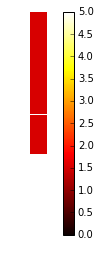

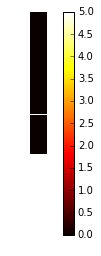

Fluxing compartment'sgrow_ht:5.09654757713e-05
running from 194.500000 s until 195.000000 s with time step of 1e-06 seconds 
time taken: 21327.005553
Fluxing compartment'sgrow_ht:5.15707792519e-05
running from 195.000000 s until 195.500000 s with time step of 1e-06 seconds 
time taken: 21505.59388
Fluxing compartment'sgrow_ht:5.23539349043e-05
running from 195.500000 s until 196.000000 s with time step of 1e-06 seconds 
time taken: 21683.318357
Fluxing compartment'sgrow_ht:5.31515129331e-05
running from 196.000000 s until 196.500000 s with time step of 1e-06 seconds 
time taken: 21860.737133
Fluxing compartment'sgrow_ht:5.39616644635e-05
running from 196.500000 s until 197.000000 s with time step of 1e-06 seconds 
time taken: 22039.760788
Fluxing compartment'sgrow_ht:5.47844852662e-05
running from 197.000000 s until 197.500000 s with time step of 1e-06 seconds 
time taken: 22216.699077
Fluxing compartment'sgrow_ht:5.56201264451e-05
running from 197.500000 s until 198.000000 s with time

time taken: 30858.123537
Fluxing compartment'sgrow_ht:0.000116693343949
running from 222.000000 s until 222.500000 s with time step of 1e-06 seconds 
time taken: 31034.134859
Fluxing compartment'sgrow_ht:0.000118461454131
running from 222.500000 s until 223.000000 s with time step of 1e-06 seconds 
time taken: 31209.859829
Fluxing compartment'sgrow_ht:0.000120255783119
running from 223.000000 s until 223.500000 s with time step of 1e-06 seconds 
time taken: 31385.536498
Fluxing compartment'sgrow_ht:0.000122076705001
running from 223.500000 s until 224.000000 s with time step of 1e-06 seconds 
time taken: 31560.77581
Fluxing compartment'sgrow_ht:0.000123924598951
running from 224.000000 s until 224.500000 s with time step of 1e-06 seconds 
time taken: 31736.101271
Fluxing compartment'sgrow_ht:0.000125799849289
running from 224.500000 s until 225.000000 s with time step of 1e-06 seconds 
time taken: 31911.602165
Fluxing compartment'sgrow_ht:0.000127702845539
running from 225.000000 s unt

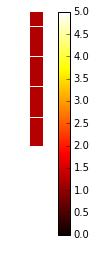

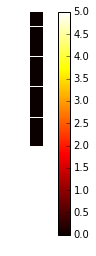

running from 240.500000 s until 244.500000 s with time step of 1e-06 seconds 
time taken: 40189.610944
[[0.011249999999999996], [-0.083839999999999998], [-0.072590000000000002]]
[[0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996, 0.011249999999999996], [-0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998, -0.083839999999999998], [-0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002, -0.072590000000000002]]


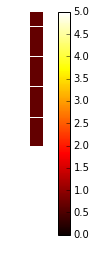

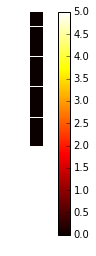

In [3]:
[sim,gui]=grow_ht(nr=3,textra=7,say='grow_ht')